In [4]:
import numpy as np
import random
from operator import add
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from __future__ import unicode_literals

In [27]:
# Define gridworld class
class Gridworld:
    def __init__(self, gridworld_length=2, gridworld_width=10, num_obstacles=10,
                 collisionReward= -1, destinationReward= 10, defaultReward= 0, failChance= 0.1, gamma= 0.9):
        self.gridworld_length = gridworld_length
        self.gridworld_width = gridworld_width
        self.grid = np.zeros((gridworld_length,gridworld_width))
        self.ds_actions = {"u": [0,-1], "d": [0,1], "l": [-1,0], "r": [1,0]}
        self.actions= list(self.ds_actions.keys()),
        self.num_obstacles = num_obstacles
        self.source, self.destination, self.obstacle_positions = self.initiate_gridworld()
        self.agent = self.source
        self.collisionReward = collisionReward
        self.destinationReward = destinationReward
        self.defaultReward = defaultReward
        self.failChance = failChance
        self.gamma = gamma

    def random_coord(self):
        return [random.randint(0, self.gridworld_length-1), random.randint(0, self.gridworld_width-1)]

    def initiate_gridworld(self):
        # add a random source and destination to the gridworld
        source = self.random_coord()
        destination = self.random_coord()
        while destination == source:
            destination = self.random_coord()

        # add some random obstacles to the gridworld, making sure that the source and destination are not obstacles
        obstacle_positions = []
        print(self.num_obstacles)
        
        while len(obstacle_positions) < self.num_obstacles:
            position = self.random_coord()
            if position != source or position != destination:
                obstacle_positions.append(position)
        print(source, destination, obstacle_positions)
        return source, destination, obstacle_positions

    def takeAction(self, a):
        # take action with probability 0.1, stay in same state with probability 0.9
        if random.random() < 1 - self.failChance:
            print(self.agent, self.ds_actions[a])
            new_agent = list(map(add, self.agent, self.ds_actions[a]))
            print(new_agent)
            # if collision
            if new_agent[0] < 0 or new_agent[0] >= self.gridworld_length or \
                new_agent[1] < 0 or new_agent[1] >= self.gridworld_width or \
                new_agent in self.obstacle_positions:
                return self.collisionReward
            self.agent = new_agent
            if new_agent == self.destination:
                return self.destinationReward
        return self.defaultReward

    def print_gridworld(self):
        for row in range(self.gridworld_length):
            for col in range(self.gridworld_width):
                if [row,col] in self.obstacle_positions:
                    print('O', end=' ')
                elif [row,col] == self.destination:
                    print('D', end=' ')
                elif [row, col] == self.agent:
                    print('A', end=' ')
                else:
                    print('-', end=' ')
            print()
    
    def gridworld_to_arr(self):
        char_grid = np.zeros([self.gridworld_length, self.gridworld_width]).astype('<U1')
        for row in range(self.gridworld_length):
            for col in range(self.gridworld_width):
                if [row,col] in self.obstacle_positions:
                    char_grid[row, col] = 'O'
                elif [row,col] == self.destination:
                    char_grid[row, col] = 'D'
                elif [row, col] == self.agent:
                    char_grid[row, col] = 'A'
                else:
                    char_grid[row, col] = '-'
        return char_grid



In [28]:
# Visualization helper functions
def chars_to_num(char_grid):
    """
    Creates a copy of a 2D character gridworld converted into a 2D array of integers
    for easy visualization in matplotlib. The mapping is as follows:
    '-' --> 0
    'A' --> 1 
    'O' --> 2
    'D' --> 3
    """
    num_grid = char_grid.copy()
    num_grid[num_grid == '-'] = 0
    num_grid[num_grid == 'A'] = 1
    num_grid[num_grid == 'O'] = 2
    num_grid[num_grid == 'D'] = 3
    num_grid = num_grid.astype('int64')
    return num_grid

def chars_to_icons(char_grid):
    """
    Creates a copy of a 2D character gridworld converted into a 2D array of integers
    for easy visualization in matplotlib. The mapping is as follows:
    '-' --> '🍂'
    'A' --> '🤖' 
    'O' --> '🌲'
    'D' --> '🧗🏽'
    """
    icon_grid = char_grid.copy()
    icon_grid[icon_grid == '-'] = '🍂'
    icon_grid[icon_grid == 'A'] = '🤖'
    icon_grid[icon_grid == 'O'] = '🌲'
    icon_grid[icon_grid == 'D'] = '🧗'
    return icon_grid

def visualize_grid(char_grid):
    """
    Visualize a 2D grid of characters in matplotlib with emojis
    """
    colors = ['saddlebrown', 'red', 'green', 'yellow']
    cmap = ListedColormap(colors)
    fig, ax = plt.subplots()
    num_grid = chars_to_num(char_grid)
    icon_grid = chars_to_icons(char_grid)

    for y in range(char_grid.shape[0]):
       for x in range(char_grid.shape[1]):
          plt.text(x , y, icon_grid[y, x],
             horizontalalignment='center',
             verticalalignment='center',
             fontname='Segoe UI Emoji'
          )
    ax.matshow(num_grid, cmap=cmap, vmin=0, vmax=len(colors))


10
[7, 5] [5, 3] [[8, 1], [7, 8], [4, 2], [5, 0], [5, 4], [3, 7], [8, 1], [1, 7], [2, 3], [2, 9]]
- - - - - - - - - - 
- - - - - - - O - - 
- - - O - - - - - O 
- - - - - - - O - - 
- - O - - - - - - - 
O - - D O - - - - - 
- - - - - - - - - - 
- - - - - A - - O - 
- O - - - - - - - - 
- - - - - - - - - - 
Taking action: r
[7, 5] [1, 0]
[8, 5]
Action:  r Reward:  0
- - - - - - - - - - 
- - - - - - - O - - 
- - - O - - - - - O 
- - - - - - - O - - 
- - O - - - - - - - 
O - - D O - - - - - 
- - - - - - - - - - 
- - - - - - - - O - 
- O - - - A - - - - 
- - - - - - - - - - 
Taking action: l
[8, 5] [-1, 0]
[7, 5]
Action:  l Reward:  0
- - - - - - - - - - 
- - - - - - - O - - 
- - - O - - - - - O 
- - - - - - - O - - 
- - O - - - - - - - 
O - - D O - - - - - 
- - - - - - - - - - 
- - - - - A - - O - 
- O - - - - - - - - 
- - - - - - - - - - 
Taking action: l
[7, 5] [-1, 0]
[6, 5]
Action:  l Reward:  0
- - - - - - - - - - 
- - - - - - - O - - 
- - - O - - - - - O 
- - - - - - - O - - 
- - O 

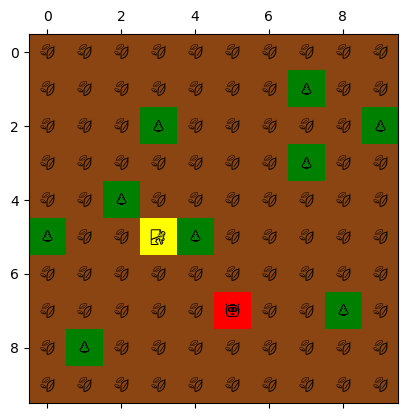

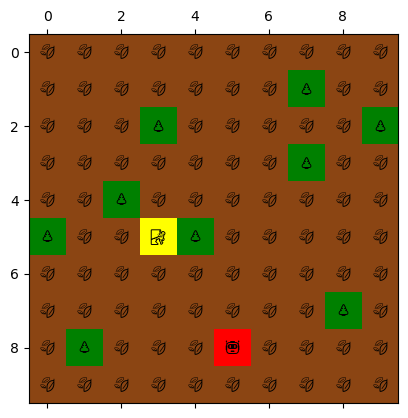

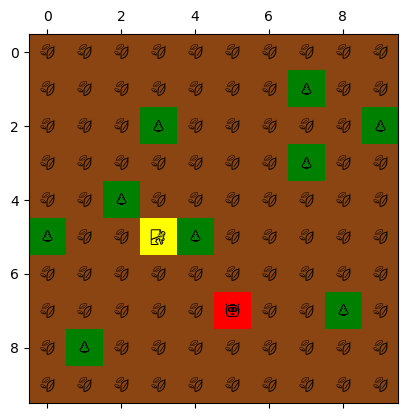

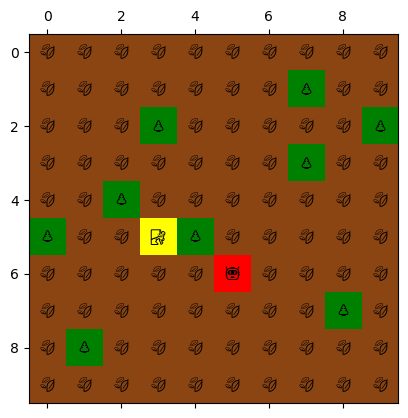

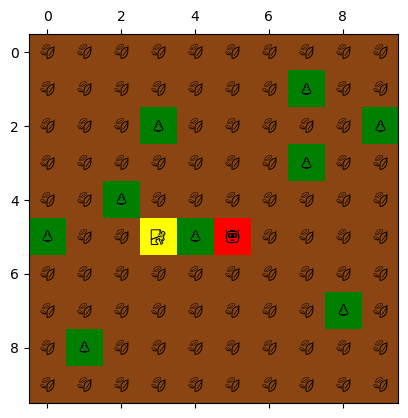

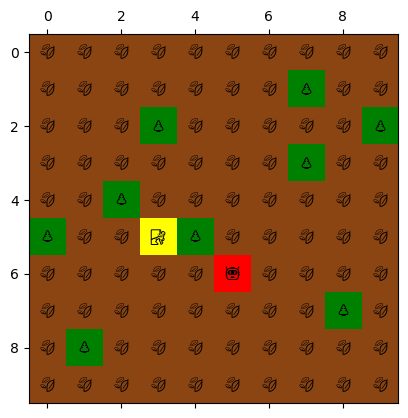

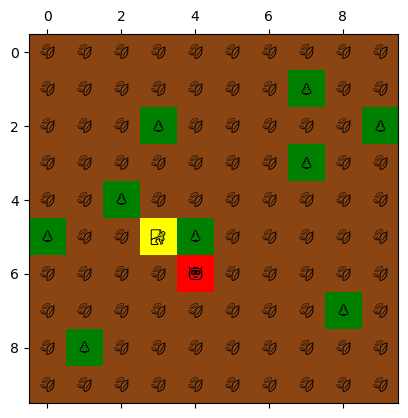

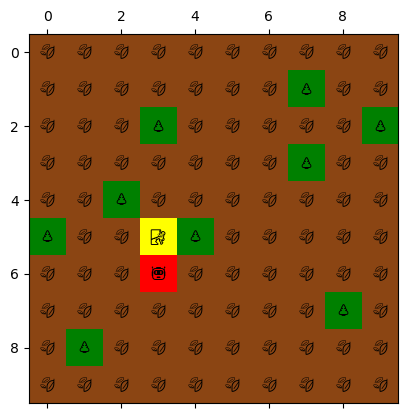

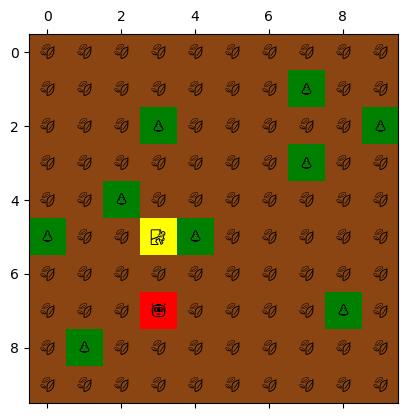

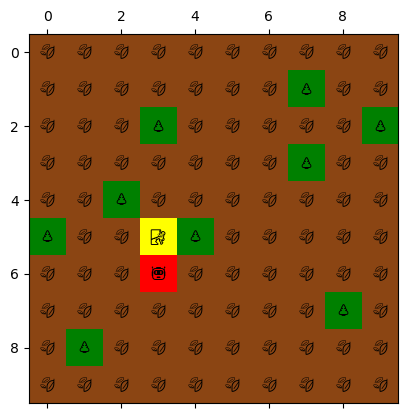

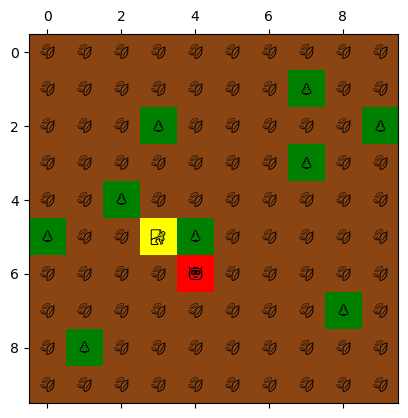

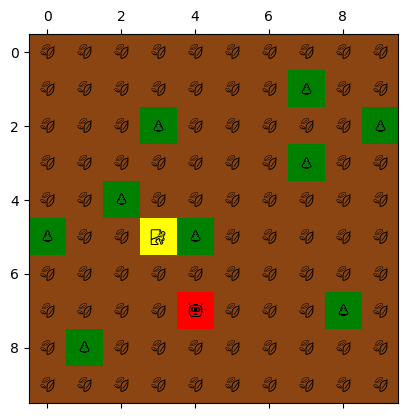

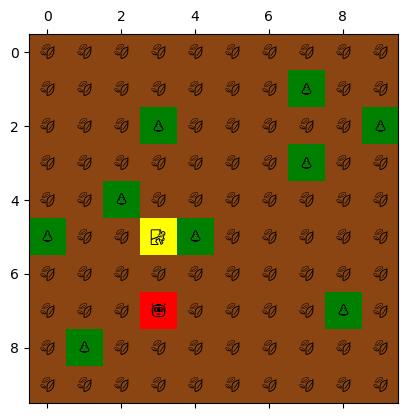

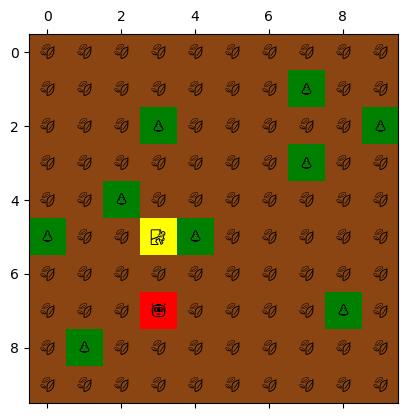

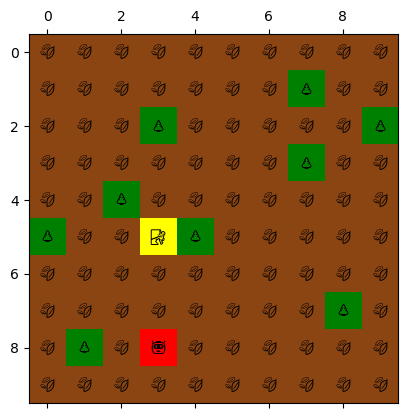

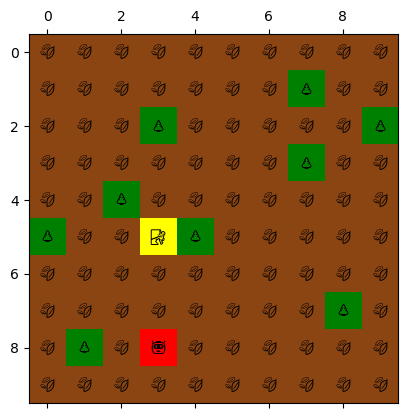

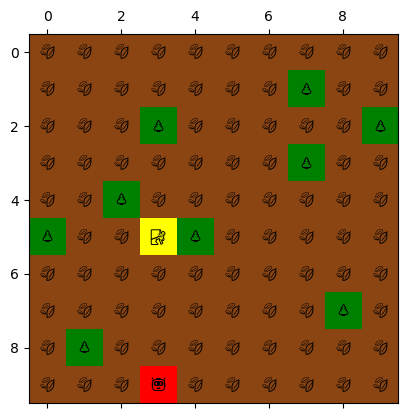

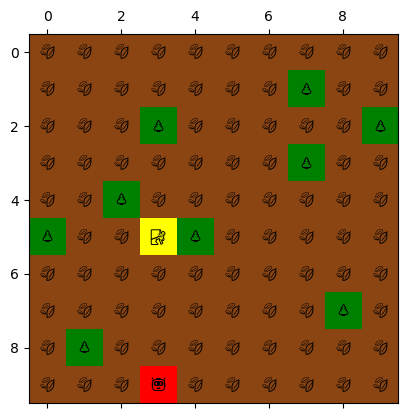

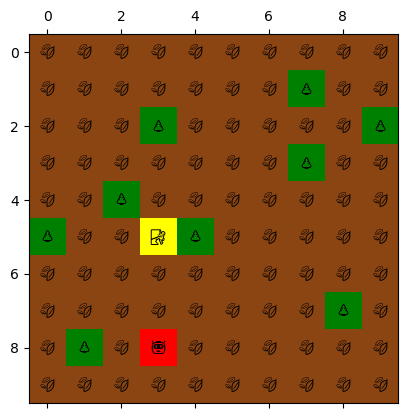

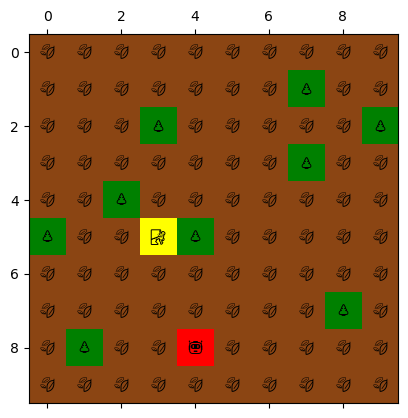

In [29]:
# simulate random policy
rewards=[]
g = Gridworld(gridworld_length=10)
# simulate the agent's actions
for _ in range(20):
    g.print_gridworld()
    visualize_grid(g.gridworld_to_arr())
    # choose a random action
    action = random.choice(g.actions[0])
    print(f'Taking action: {action}')
    # take the action and update the agent's position
    reward = g.takeAction(action)
    print("Action: ", action, "Reward: ", reward)
    rewards.append(reward)    